In [23]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [52]:
def parabola(x,a,b):
    return a*x+b

In [53]:
problem ={
    'num_vars': 2,
    'names': ['a','b'],
    'bounds': [[0,2]]*2
}

In [54]:
# sample
param_values = saltelli.sample(problem, 2**6)

# print(param_values)

# evaluate
x = np.linspace(-1, 1, 100)
y = np.array([parabola(x, *params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

print("Sobol Indices")
# print(sobol_indices)

Sobol Indices


C:\Users\admin\AppData\Local\Temp\ipykernel_25068\1678471485.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**6)


IndexError: index 1 is out of bounds for axis 1 with size 1

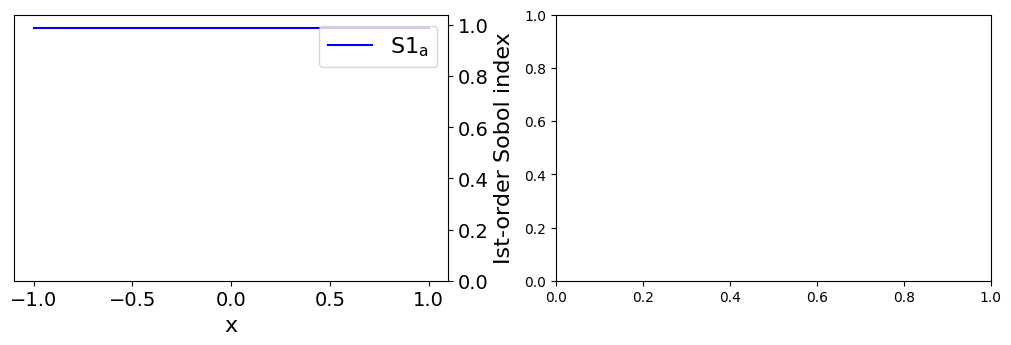

In [55]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()

[[[            nan  5.91124497e-03]
  [            nan             nan]]

 [[            nan  5.83572086e-03]
  [            nan             nan]]

 [[            nan  5.75813194e-03]
  [            nan             nan]]

 [[            nan  5.67846863e-03]
  [            nan             nan]]

 [[            nan  5.59672311e-03]
  [            nan             nan]]

 [[            nan  5.51288933e-03]
  [            nan             nan]]

 [[            nan  5.42696308e-03]
  [            nan             nan]]

 [[            nan  5.33894212e-03]
  [            nan             nan]]

 [[            nan  5.24882620e-03]
  [            nan             nan]]

 [[            nan  5.15661718e-03]
  [            nan             nan]]

 [[            nan  5.06231904e-03]
  [            nan             nan]]

 [[            nan  4.96593799e-03]
  [            nan             nan]]

 [[            nan  4.86748253e-03]
  [            nan             nan]]

 [[            nan  4.76696349e-03]
  

ValueError: x and y must have same first dimension, but have shapes (100,) and (2, 2)

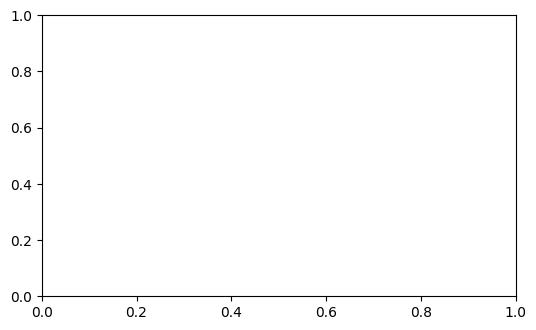

In [ ]:
S1s = np.array([s['S2'] for s in sobol_indices])
print(S1s)
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax0 = fig.add_subplot(gs[0, 0])
# ax1 = fig.add_subplot(gs[0, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0]):
    ax.plot(x, S1s[i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right',fontsize=16)

# ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# # in percent
# prediction_interval = 95

# ax0.fill_between(x,
#                  np.percentile(y, 50 - prediction_interval/2., axis=0),
#                  np.percentile(y, 50 + prediction_interval/2., axis=0),
#                  alpha=0.5, color='black',
#                  label=f"{prediction_interval} % prediction interval")

# ax0.set_xlabel("x")
# ax0.set_ylabel("y")
# ax0.legend(title=r"$y=a+b\cdot x^2$",
#            loc='upper center')._legend_box.align = "left"
plt.tight_layout()
fig.savefig("sobol.png",dpi=800)
plt.show()